In [1]:
import pandas as pd
import sys
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader , random_split
sys.path.append("../")
from tqdm import tqdm
from tcad.deep.fit import train_CNN, evaluate_CNN
from tcad.deep.models import CNN
from tcad.tools.nntools import SmilesDataSet
from tcad.tools.datatools import to_log_p

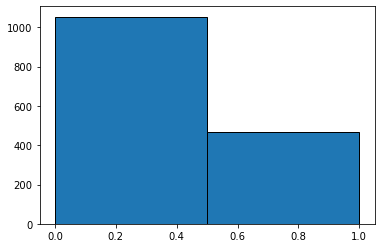

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

ACTIVITY_LVL = 5.5
labels = to_log_p(list(data['standard_value']))
labels = [1 if value < ACTIVITY_LVL else 0 for value in labels]

plt.hist(labels,2, edgecolor='black')
plt.show()

In [3]:
split_ratio = 0.3
dataset = SmilesDataSet(smiles, labels)
train_data, test_data  = random_split(dataset, [round(len(dataset) * (1 - split_ratio)), round(len(dataset) * split_ratio)])
train_dataloader = DataLoader(train_data, batch_size=64,)
test_dataloader = DataLoader(test_data, batch_size=64)

label: tensor([0.]) 
shape: 1x165x34


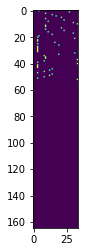

In [4]:
example = 2
encoded_smiles, label= next(iter(train_dataloader))
print(f"label: {label[example]} \nshape: {encoded_smiles.shape[1]}x{encoded_smiles.shape[2]}x{encoded_smiles.shape[3]}")
plt.imshow(encoded_smiles[example].squeeze())
plt.show()

In [5]:
model = CNN()
losses = []

for _ in tqdm(range(1)):
    loss = train_CNN(model, train_dataloader)
    losses.append(loss)


100%|██████████| 1/1 [05:06<00:00, 306.27s/it]


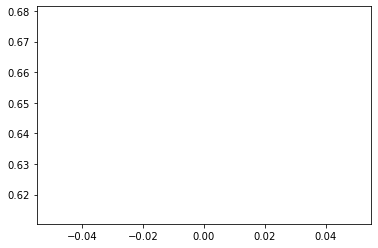

In [8]:
plt.plot(losses)
plt.show()

In [9]:
evaluate_CNN(model, test_dataloader)

66.886